# Assignment 3
This file covers the solutions to the 2 questions on assignment 3.
1. Exploring Linear SVM classifer for a two-class classification problem.
2. Implement AdaBoost classifier with Linear SVM as the base learner.

In [1]:
# import packages
import pandas
import numpy as np
import scipy as sp
import scipy.linalg as sl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.base import clone

## Question 1

In [202]:
# load dataset: q1_classA.csv and q1_classB.csv
classA_df = pandas.read_csv('datasets/q1_classA.csv', header=None, engine='python')
classB_df = pandas.read_csv('datasets/q1_classB.csv', header=None, engine='python')

# add labels 0 for class A and 1 for class B
classA_df['class'] = 0
classB_df['class'] = 1

# combine classA and classB
df = pandas.concat([classA_df, classB_df])

# seperate featres from targets
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

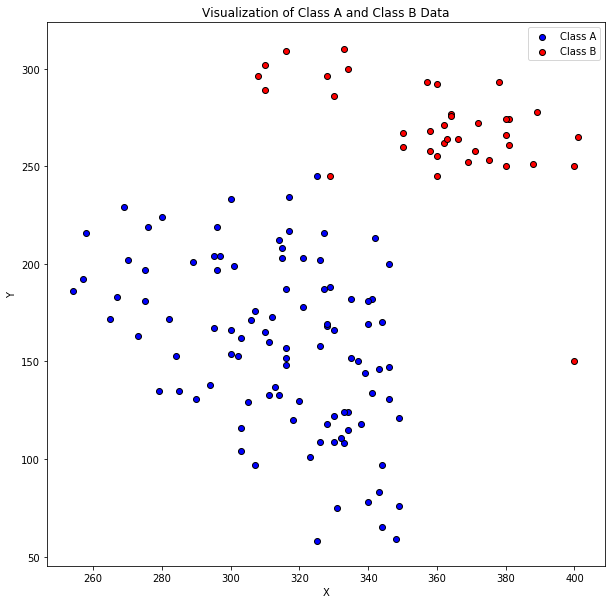

In [203]:
# part 1

# visualize class A and class B
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(classA_df[0], classA_df[1], c='b', label='Class A', edgecolors='k')
ax.scatter(classB_df[0], classB_df[1], c='r', label='Class B', edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Class A and Class B Data')
ax.legend()
plt.show()

In [208]:
# part 2-3

# create a meshgrid of points for plotting
def make_meshgrid(x, y, h=0.25):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_lin = np.linspace(x_min, x_max)
    return xx, yy, xx_lin

# plot the decision boundaries for the classifier
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plot SVM margins
def plot_svm_margins(ax, coefs, intercept, xx_lin):
    w = coefs[0]
    a = -w[0] / w[1]
    yy = a * xx_lin - (intercept) / w[1]
    
    margin = 1 / np.sqrt(np.sum(coefs ** 2))
    lower_margin = yy - np.sqrt(1 + a ** 2) * margin
    upper_margin = yy + np.sqrt(1 + a ** 2) * margin
    
    ax.plot(xx_lin, yy, 'k-')
    ax.plot(xx_lin, lower_margin, 'k--')
    ax.plot(xx_lin, upper_margin, 'k--')
    

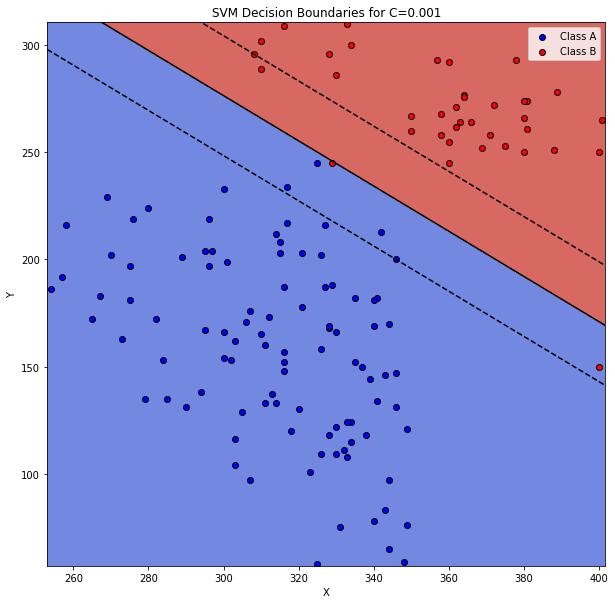

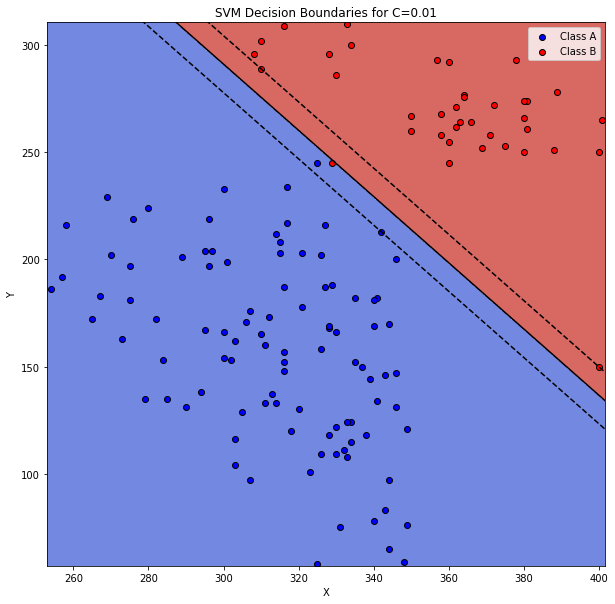

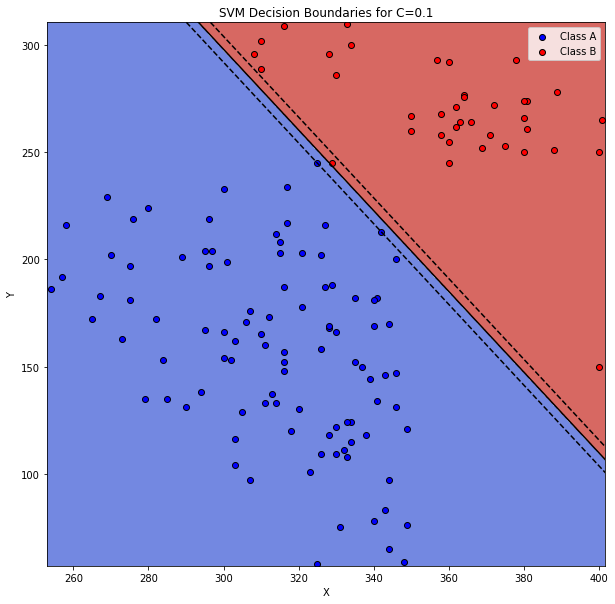

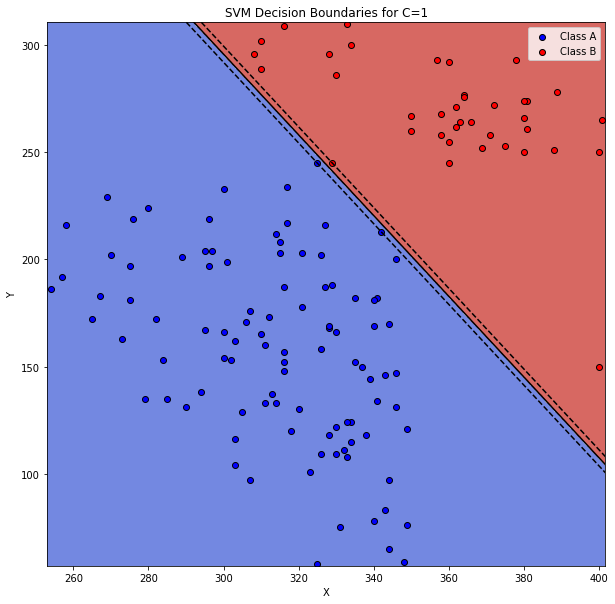

In [209]:
# plot decision boundaries for each value of C
C = [0.001, 0.01, 0.1, 1]

for c in C:
    svm = SVC(C=c, kernel='linear')
    svm.fit(X, Y)
    
    # plot decision boundaries
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy, xx_lin = make_meshgrid(X0, X1)
    
    fig, ax = plt.subplots(figsize=(10,10))
    plot_contours(ax, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    plot_svm_margins(ax, svm.coef_, svm.intercept_[0], xx_lin)
    ax.scatter(classA_df[0], classA_df[1], c='b', label='Class A', edgecolors='k')
    ax.scatter(classB_df[0], classB_df[1], c='r', label='Class B', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f"SVM Decision Boundaries for C={c}")
    ax.legend()
    plt.show()

In [5]:
# part 4

# perform CV with given number of iterations and folds
def crossvalidation(clf, X, Y, iters=10, k=10):
    numsamples = X.shape[0]

    accuracy_scores = []
    for i in range(iters):

        # single iteration of k-fold CV
        idxs = np.arange(numsamples)
        folds = np.random.choice(idxs, size=(k, int(numsamples/k)), replace=False)

        # obtain accuracy scores for k-fold CV
        kfold_accuracy_scores = []
        for j in range(k):
            test_idx = folds[j]
            train_idx = np.delete(folds, j, axis=0).ravel()
            
            # fit classifer and get predictions
            clf.fit(X[train_idx], Y[train_idx])
            y_pred = clf.predict(X[test_idx])
            
            # compute accuracy
            accuracy = accuracy_score(Y[test_idx], y_pred)
            kfold_accuracy_scores.append(accuracy)

        accuracy_scores.append(np.mean(kfold_accuracy_scores))
    
    return accuracy_scores


In [30]:
# use 10 times 10 fold CV to find best C
C = [0.001, 0.01, 0.1, 1]

for c in C:
    svm = SVC(C=c, kernel='linear')
    acc = crossvalidation(svm, X, Y, iters=10)
    
    print(f"SVM with C = {c:<5} - Accuracy: {np.mean(acc):.4f}")

SVM with C = 0.001 - Accuracy: 0.9815
SVM with C = 0.01  - Accuracy: 0.9769
SVM with C = 0.1   - Accuracy: 0.9854
SVM with C = 1     - Accuracy: 0.9792


## Question 2

In [2]:
# load dataset: classA.csv and classB.csv
classA_df = pandas.read_csv('datasets/classA.csv', header=None, engine='python')
classB_df = pandas.read_csv('datasets/classB.csv', header=None, engine='python')

# add labels 0 for class A and 1 for class B
classA_df['class'] = -1
classB_df['class'] = 1

# combine classA and classB
df = pandas.concat([classA_df, classB_df])

# seperate featres from targets
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

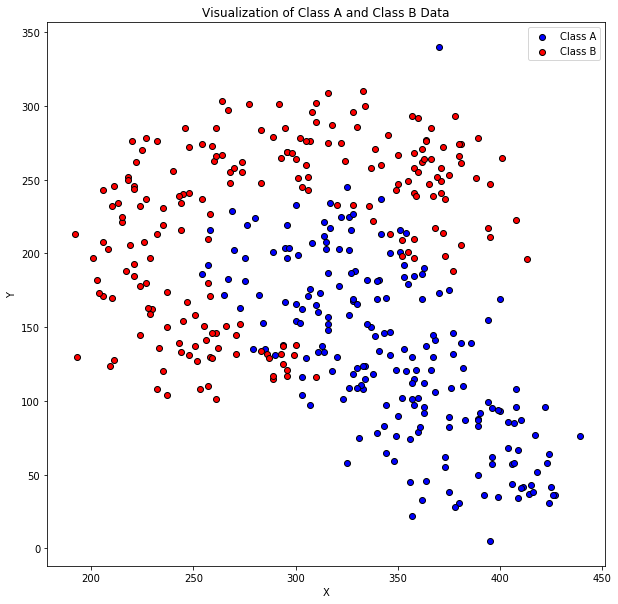

In [211]:
# part 1

# visualize class A and class B
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(classA_df[0], classA_df[1], c='b', label='Class A', edgecolors='k')
ax.scatter(classB_df[0], classB_df[1], c='r', label='Class B', edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualization of Class A and Class B Data')
ax.legend()
plt.show()

In [40]:
%%time
# part 2

# use 10 times 10 fold CV to find best C
C = [0.1, 1, 10, 100]

for c in C:
    svm = SVC(C=c, kernel='linear')
    acc = crossvalidation(svm, X, Y, iters=10)
    
    print(f"SVM with C = {c:<5} - Accuracy: {np.mean(acc):.4f}")

SVM with C = 0.1   - Accuracy: 0.7978
SVM with C = 1     - Accuracy: 0.7953
SVM with C = 10    - Accuracy: 0.7955
SVM with C = 100   - Accuracy: 0.7958
Wall time: 1h 6s


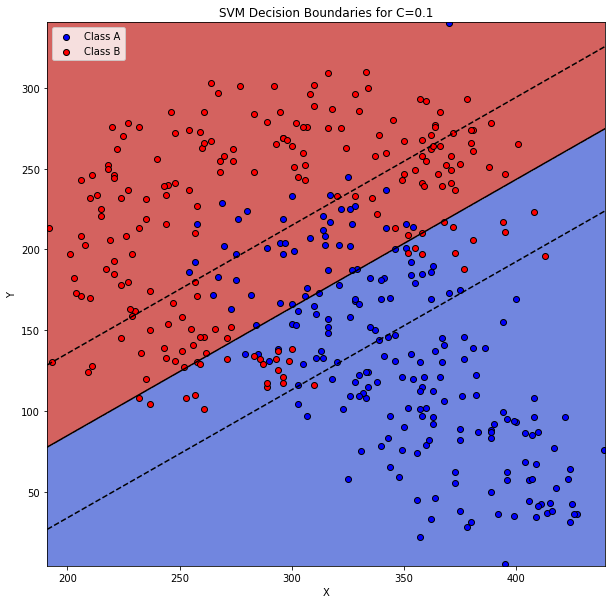

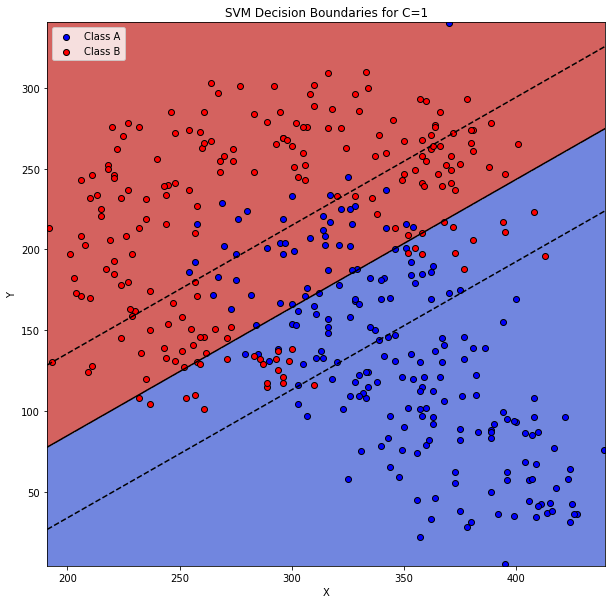

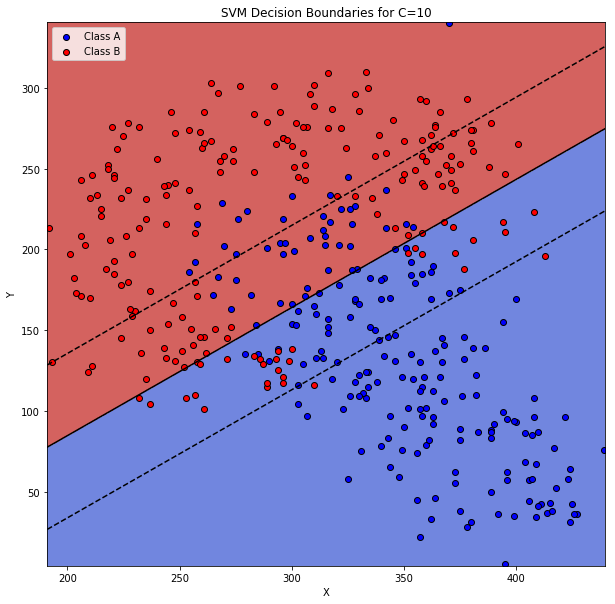

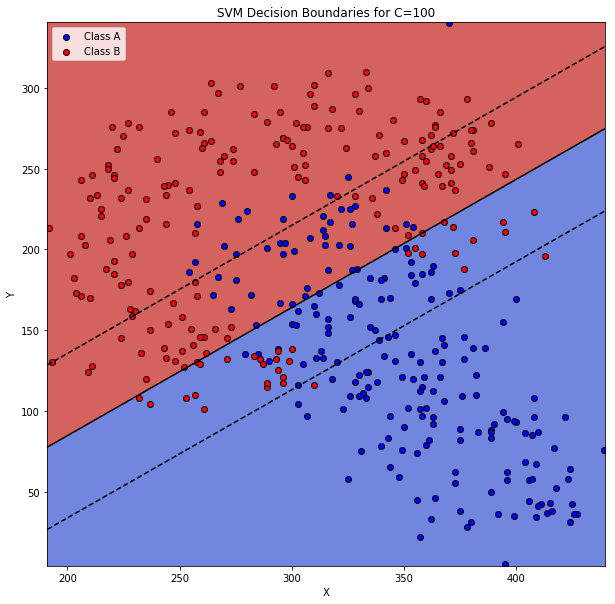

In [212]:
# plot decision boundaries for each value of C
C = [0.1, 1, 10, 100]

for c in C:
    svm = SVC(C=c, kernel='linear')
    svm.fit(X, Y)
    
    # plot decision boundaries
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy, xx_lin = make_meshgrid(X0, X1)
    
    fig, ax = plt.subplots(figsize=(10,10))
    plot_contours(ax, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    plot_svm_margins(ax, svm.coef_, svm.intercept_[0], xx_lin)
    ax.scatter(classA_df[0], classA_df[1], c='b', label='Class A', edgecolors='k')
    ax.scatter(classB_df[0], classB_df[1], c='r', label='Class B', edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f"SVM Decision Boundaries for C={c}")
    ax.legend()
    plt.show()

In [3]:
# part 3

# implementation of AdaBoost.M1
class AdaBoost:
    
    def __init__(self, base_clf, T=50):
        self.weak_learner = base_clf   # weak learner used for Ada Boost
        self.T = T                     # max number of weak learners
        
    def fit(self, X_train, Y_train):
        self.clf = buildAdaBoost(self.weak_learner, self.T, X_train, Y_train)
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            y_pred.append(predictClass(self.clf, x))
            
        return np.array(y_pred)
    

# find hypothesis function using AdaBoost.M1
def buildAdaBoost(weak_learner, T, X, Y):
    numsamples = X.shape[0]
    
    # initialize output lists
    weak_learners = []
    alphas = []
    
    # initialize distribution
    W = np.ones(numsamples)
    idxs = np.arange(numsamples)
    
    # find T weak learners
    while len(weak_learners) < T:

        # normalize weights and sample from distribution
        W *= 1/sum(W)
        idx_sampled = np.random.choice(idxs, size=100, p=W, replace=True)
        
        # train on sampled data
        learner = clone(weak_learner)
        learner.fit(X[idx_sampled], Y[idx_sampled])
        
        # calculate error
        error = 0
        h = []
        for i in range(numsamples):
            y_pred = learner.predict([X[i]])[0]
            h.append(y_pred)
            if y_pred != Y[i]:
                error += W[i]
        error /= sum(W)
        
        # check restart criteria, if error > 0.5 restart
        if error <= 0.5:

            # calculate alpha
            alpha = 0.5 * np.log((1 - error) / error)

            # update weights
            for i in range(len(W)):
                W[i] *= np.exp(-alpha*Y[i]*h[i])

            # add learner and beta to output lists
            weak_learners.append(learner)
            alphas.append(alpha)
        
    return (weak_learners, alphas)


# predict class using provided classfier
def predictClass(clfs, x):
    classifers = clfs[0]
    alphas = clfs[1]
    
    # compute hypothesis function
    h_value = 0
    for clf, alpha in zip(classifers, alphas):
        y_pred = clf.predict([x])
        h_value += alpha * y_pred
        
    h = -1 if h_value < 0 else 1
    return h        


In [9]:
# part 4

# perform CV with given number of iterations and folds
def crossvalidation(clf, X, Y, iters=10, k=10):
    numsamples = X.shape[0]

    accuracy_scores = []
    for i in range(iters):

        # single iteration of k-fold CV
        idxs = np.arange(numsamples)
        folds = np.random.choice(idxs, size=(k, int(numsamples/k)), replace=False)

        # obtain accuracy scores for k-fold CV
        kfold_accuracy_scores = []
        for j in range(k):
            test_idx = folds[j]
            train_idx = np.delete(folds, j, axis=0).ravel()
            
            # fit classifer and get predictions
            clf.fit(X[train_idx], Y[train_idx])
            y_pred = clf.predict(X[test_idx])
            
            # compute accuracy
            accuracy = accuracy_score(Y[test_idx], y_pred)
            kfold_accuracy_scores.append(accuracy)

        accuracy_scores.append(np.mean(kfold_accuracy_scores))
    
    return accuracy_scores


In [11]:
%%time
# perform 10 times 10 fold CV
c = 0.1
T = 50
base_clf = SVC(C=c, kernel='linear')
adaboost_clf = AdaBoost(base_clf, T=T)
acc = crossvalidation(adaboost_clf, X, Y, iters=10)

print(f"AdaBoost with T = {T}, using SVM with C = {c} - Accuracy: {np.mean(acc):.4f}    Variance: {np.var(acc, ddof=0):.4f}")

AdaBoost with T = 50, using SVM with C = 0.1 - Accuracy: 0.8930    Variance: 0.0001
Wall time: 3min 6s


In [6]:
# part 5

# create a meshgrid of points for plotting
def make_meshgrid(x, y, h=1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_lin = np.linspace(x_min, x_max)
    return xx, yy, xx_lin

# plot the decision boundaries for the classifier
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plot SVM margins
def plot_svm_margins(ax, coefs, intercept, xx_lin):
    w = coefs[0]
    a = -w[0] / w[1]
    yy = a * xx_lin - (intercept) / w[1]
    
    margin = 1 / np.sqrt(np.sum(coefs ** 2))
    lower_margin = yy - np.sqrt(1 + a ** 2) * margin
    upper_margin = yy + np.sqrt(1 + a ** 2) * margin
    
    ax.plot(xx_lin, yy, 'k-')
    ax.plot(xx_lin, lower_margin, 'k--')
    ax.plot(xx_lin, upper_margin, 'k--')
    

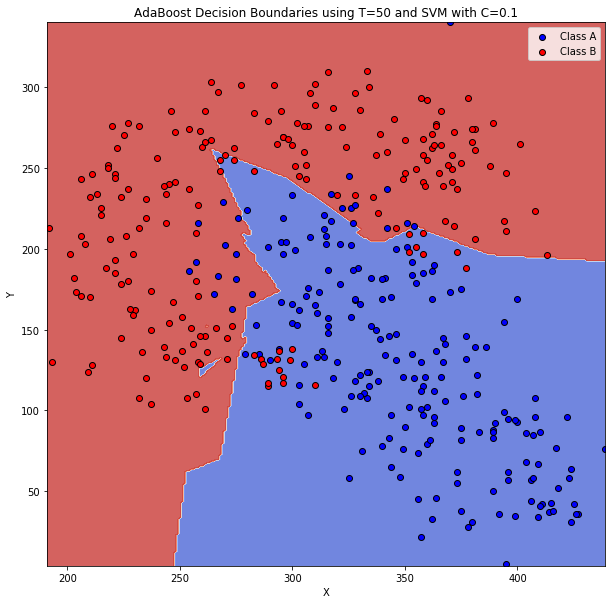

Wall time: 4min


In [7]:
%%time
# plot decision boundaries for AdaBoost
c = 0.1
T = 50
base_clf = SVC(C=c, kernel='linear')
adaboost_clf = AdaBoost(base_clf, T=T)
adaboost_clf.fit(X, Y)

# plot decision boundaries
X0, X1 = X[:, 0], X[:, 1]
xx, yy, xx_lin = make_meshgrid(X0, X1)

fig, ax = plt.subplots(figsize=(10,10))
plot_contours(ax, adaboost_clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(classA_df[0], classA_df[1], c='b', label='Class A', edgecolors='k')
ax.scatter(classB_df[0], classB_df[1], c='r', label='Class B', edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f"AdaBoost Decision Boundaries using T={T} and SVM with C={c}")
ax.legend()
plt.show()